# Introductory applied machine learning (INFR10069) 

# Lab 3: Support Vector Machine (SVM) Classification and Evaluation

In this lab we initially re-examine the spam filtering problem from Lab 2. This time, we train a Logistic Regression model and a linear Support Vector Machine for the spam or non-spam classification task. In the second part of the lab we examine classification evaluation by using a K-nearest neighbour classifier.


All the datasets that you will need for this lab are located within the `datasets` directory (adjacent to this file).

In [1]:
# Import packages
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, log_loss
from pandas.api.types import CategoricalDtype
KNeighboursClassifier = KNeighborsClassifier # For the Brits!
%matplotlib inline

C:\Users\larsw\anaconda3\envs\py3iaml\lib\site-packages\sklearn\utils\__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence


## 1. Spam filtering

### ========== Question 1.1 ==========
Load `spambase_binary.csv` into a pandas DataFrame structure called `spambase`. Display the number of instances and attributes and the first 5 samples. Remember that the attributes have been binarised. The instances have also been shuffled (i.e. their order has been randomised). 

In [7]:
data_path = os.path.join(os.getcwd(), 'datasets', 'spambase_binary.csv')
spam_bin = pd.read_csv(data_path, delimiter = ',')
print("Instances:", len(spam_bin))
print("Attributes:", len(spam_bin.columns))
spam_bin.head(5)

Instances: 4601
Attributes: 55


,word_freq_make_binarized,word_freq_address_binarized,word_freq_all_binarized,word_freq_3d_binarized,word_freq_our_binarized,word_freq_over_binarized,word_freq_remove_binarized,word_freq_internet_binarized,word_freq_order_binarized,word_freq_mail_binarized,...,word_freq_edu_binarized,word_freq_table_binarized,word_freq_conference_binarized,char_freq_;_binarized,char_freq_(_binarized,char_freq_[_binarized,char_freq_!_binarized,char_freq_$_binarized,char_freq_#_binarized,is_spam
0,0,1,0,0,1,0,1,1,0,1,...,0,0,0,0,1,1,1,1,0,1
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0


### ========== Question 1.2 ==========
We are going to use hold-out validation to evaluate our models below. Split the dataset into training and testing subsets using the `train_test_split` [function](http://scikit-learn.org/0.19/modules/generated/sklearn.cross_validation.train_test_split.html) we have used before. Call the resulting matrices `X_train`, `X_test`, `y_train`, `y_test`. Use 90% of the data for training and the remaining 10% for testing. Make sure you don't include the target variable `is_spam` in the input features (`X_train` / `X_test`)!

If you want to be able to reproduce your results exactly, what argument must you remember to set?

In [16]:
X = spam_bin.drop(columns=["is_spam"])
y = spam_bin["is_spam"]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.9, test_size = 0.1, random_state=42)

Setting the random_state argument to an arbitrary number will make our results reproducable.

### ========== Question 1.3 ==========
Train a [`LogisticRegression`](http://scikit-learn.org/0.19/modules/generated/sklearn.linear_model.LogisticRegression.html) classifier by using training data. Use the `lbfgs` solver and default settings for the other parameters. Report the classification accuracy on both the training and test sets. Does your classifier generalise well on unseen data?

In [25]:
from sklearn.metrics import accuracy_score

log_reg = LogisticRegression(solver="lbfgs")
log_reg.fit(X_train, y_train)
print("Training accuracy:\t", accuracy_score(y_train, log_reg.predict(X_train)))
print("Testing accuracy:\t", accuracy_score(y_test, log_reg.predict(X_test)))

Training accuracy:	 0.9335748792270532
Testing accuracy:	 0.9392624728850325


The accuracy on the testing data is actually slightly better than on the training data. Our classifier appears to generalise amazingly to unseen data. 

### ========== Question 1.4 ==========
Print the coefficients for class 1 for the attributes `word_freq_hp_binarized` and `char_freq_$_binarized`. Generally, we would expect the string `$` to appear in spam, and the string `hp` to appear in non-spam e-mails, as the data was collected from HP Labs. Do the regression coefficients make sense given that class 1 is spam? *Hint: Consider the sigmoid function and how it transforms values into a probability between 0 and 1. Since our attributes are boolean, a positive coefficient can only increase the total sum fed through the sigmoid and thus move the output of the sigmoid towards 1. What can happen if we have continuous, real-valued attributes?*

In [36]:
print("hp:\t", log_reg.coef_[0][np.where(spam_bin.columns == "word_freq_hp_binarized")][0])
print("$:\t", log_reg.coef_[0][np.where(spam_bin.columns == "char_freq_$_binarized")][0])

hp:	 -2.668005196393516
$:	 1.8282658790687296


All our attributes can only take values 0 or 1. Thus, a word can only ever affect the output of the dot product of instance and weight vectors, and thus of the sigmoid function, if it takes value 1, i.e. is present. An attribute with negative weight will decrease the output if it appears, an attribute with positive weight will increase it. Because a large output (close to 1) corresponds to a spammy e-mail, we expect "$" to have a positive weight and "hp" to have a negative weight. And indeed, that is the case. 

If attribute values can be negative, a positive weight will decrease our output given a negative attribute value.

### ========== Question 1.5 ==========
Train a [`LinearSVC`](http://scikit-learn.org/0.19/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC) (i.e. Linear Support Vector classifier) by using default parameters. Report the classification accuracy on the training and test sets. 

In [39]:
svc = LinearSVC()
svc.fit(X_train, y_train)
print("Training accuracy:\t", accuracy_score(y_train, svc.predict(X_train)))
print("Testing accuracy:\t", accuracy_score(y_test, svc.predict(X_test)))

Training accuracy:	 0.9326086956521739
Testing accuracy:	 0.9370932754880694


### ========== Question 1.6 ==========
What are the coefficients for the attributes `word_freq_hp_binarized` and `char_freq_`$`_binarized`? Compare these to the ones you found with Logistic Regression.

In [41]:
print("hp:\t", svc.coef_[0][np.where(spam_bin.columns == "word_freq_hp_binarized")][0])
print("$:\t", svc.coef_[0][np.where(spam_bin.columns == "char_freq_$_binarized")][0])

hp:	 -0.877242685392654
$:	 0.6065817684041339


As expected, the weight corresponding to "hp" is negative, the weight corresponding to "$" positive. However, both values are more restricted, i.e. closer to 0. Their ratio is about the same as in the Log. Reg. model.

### ========== Question 1.7 ==========
How does a linear SVM relate to Logistic Regression? *Hint: Consider the classification boundary learnt in each model.*

We expect the decision boundaries that a linear SVM and a Logistic Regression model produce to be very similar.
Afterall, they are both linear. Because Logistic Regression models involve confidence, the weights of the hyperplane may be scaled differently, however the shape of the two boundary in the 2 models should be roughly the same.
A larger scale in a Log. Reg. model corresponds to a larger confidence, relevant especially near the decision boundary. 

### ========== Question 1.8 ==========
By using the [`SVC`](http://scikit-learn.org/0.19/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) class train two new support vector classifiers with Gaussian (`rbf`) and polynomial (`poly`) kernels. Again, report classification accuracies on training and test sets and compare with your results from Question 1.5.

In [45]:
svc_gauss = SVC(kernel="rbf")
svc_gauss.fit(X_train, y_train)
print("Training accuracy Gaussian:\t", accuracy_score(y_train, svc_gauss.predict(X_train)))
print("Testing accuracy Gaussian:\t", accuracy_score(y_test, svc_gauss.predict(X_test)))
svc_poly = SVC(kernel="poly")
svc_poly.fit(X_train, y_train)
print("Training accuracy Poly:\t", accuracy_score(y_train, svc_poly.predict(X_train)))
print("Testing accuracy Poly:\t", accuracy_score(y_test, svc_poly.predict(X_test)))

Training accuracy Gaussian:	 0.9350241545893719
Testing accuracy Gaussian:	 0.9370932754880694
Training accuracy Poly:	 0.798792270531401
Testing accuracy Poly:	 0.8199566160520607


The accuracy of the Gaussian SVC is very similar on the training and absolutely identical to the linear SVC on the testing data.
Interestingly, the SVC with polynomial kernel performs much worse on both sets. 

# 2. Performance assessment
We will now look at a few ways of assessing the performance of a classifier. To do so we will introduce a new data set, the [Splice](https://archive.ics.uci.edu/ml/datasets/Molecular+Biology+%28Splice-junction+Gene+Sequences%29) data set. The classification task is to identify `intron` and `exon` boundaries on gene sequences. For more information, you can read the dataset description in the link. The class attribute can take on 3 values: `N`, `IE` and `EI`.

### ========== Question 2.1 ==========
Load the `splice_train.csv` and `splice_test.csv` into two separate dataframes. Display the shape and first 10 instances for each dataframe.

In [48]:
data_path = os.path.join(os.getcwd(), 'datasets', 'splice_train.csv')
splice_train = pd.read_csv(data_path, delimiter = ',')
print("Instances:", len(splice_train))
print("Attributes:", len(splice_train.columns))
splice_train.head(10)

Instances: 2935
Attributes: 61


,pos0,pos1,pos2,pos3,pos4,pos5,pos6,pos7,pos8,pos9,...,pos51,pos52,pos53,pos54,pos55,pos56,pos57,pos58,pos59,class
0,T,G,A,T,G,C,C,T,G,C,...,C,C,C,C,C,T,G,A,G,N
1,G,C,C,C,A,T,A,T,T,C,...,T,G,G,A,C,T,T,C,C,N
2,G,G,C,T,G,C,C,G,G,A,...,A,C,T,G,T,G,T,C,T,EI
3,C,T,G,C,T,G,C,T,G,G,...,G,G,C,T,G,C,T,G,G,EI
4,T,C,C,C,C,G,A,G,C,C,...,A,T,C,A,G,C,G,C,A,N
5,A,T,A,C,C,T,G,C,C,C,...,A,T,G,G,G,G,T,C,T,EI
6,T,T,C,T,C,C,A,T,T,T,...,G,A,T,A,T,C,C,A,T,IE
7,A,A,A,G,A,T,G,A,T,A,...,A,A,G,C,C,C,T,T,C,EI
8,C,C,A,A,T,C,C,C,A,G,...,G,G,C,G,G,C,C,T,G,N
9,G,C,C,G,T,G,G,T,T,T,...,A,A,G,G,C,T,C,C,T,EI


In [49]:
data_path = os.path.join(os.getcwd(), 'datasets', 'splice_test.csv')
splice_test = pd.read_csv(data_path, delimiter = ',')
print("Instances:", len(splice_test))
print("Attributes:", len(splice_test.columns))
splice_test.head(10)

Instances: 255
Attributes: 61


,pos0,pos1,pos2,pos3,pos4,pos5,pos6,pos7,pos8,pos9,...,pos51,pos52,pos53,pos54,pos55,pos56,pos57,pos58,pos59,class
0,C,C,C,T,C,C,C,A,C,T,...,C,C,C,A,G,T,G,C,A,IE
1,C,A,C,T,G,A,G,T,T,G,...,G,A,A,C,C,A,G,T,G,N
2,C,A,G,A,C,T,G,G,G,T,...,A,G,A,C,C,A,C,A,G,EI
3,A,G,T,G,A,T,T,G,A,C,...,T,A,C,C,A,A,A,G,A,N
4,G,T,A,G,A,C,A,C,C,T,...,A,T,C,C,C,T,T,C,T,IE
5,C,T,T,G,T,T,A,C,A,G,...,C,C,G,A,G,A,A,C,C,N
6,C,G,T,C,A,A,T,C,A,A,...,A,A,A,A,T,T,A,A,G,EI
7,G,T,C,C,G,T,G,C,C,T,...,G,C,C,C,T,T,T,G,C,N
8,A,T,A,C,C,T,G,T,A,G,...,C,G,T,T,T,A,T,A,T,N
9,G,G,T,G,G,G,C,C,A,A,...,C,A,G,G,C,A,T,G,G,N


### ========== Question 2.2 ========== 
Convert the categorical attributes into numeric ones by using the [`get_dummies(...)`](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.get_dummies.html) function from pandas. Make sure to take care of the values `D`, `N`, `S`, `R` (see the [documentation](https://archive.ics.uci.edu/ml/datasets/Molecular+Biology+%28Splice-junction+Gene+Sequences%29) for the data). *Hint: checkout the pandas [`CategoricalDtype`](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html#pandas.api.types.CategoricalDtype)*. Also, make sure to not transform the target variable (`class`).

In [66]:
possible_categories = list("AGCTDNSR")

train_dummies = pd.get_dummies(splice_train.drop(columns="class").astype
                               (CategoricalDtype(categories=possible_categories)))
test_dummies = pd.get_dummies(splice_test.drop(columns="class").astype
                               (CategoricalDtype(categories=possible_categories)))

### ========== Question 2.3 ==========
Store the training and testing data into numpy arrays `X_train`, `y_train`, `X_test` and `y_test`. Display the shapes of the four arrays.

In [69]:
X_train = train_dummies
X_test = test_dummies
y_train = splice_train["class"]
y_test = splice_test["class"]
print("Shape X_train:\t", X_train.shape)
print("Shape y_train:\t", y_train.shape)
print("Shape X_test:\t", X_test.shape)
print("Shape y_test:\t", y_test.shape)

Shape X_train:	 (2935, 480)
Shape y_train:	 (2935,)
Shape X_test:	 (255, 480)
Shape y_test:	 (255,)


### ========== Question 2.4 ==========
Familiarise yourself with [Nearest Neighbours Classification](http://scikit-learn.org/0.19/modules/neighbors.html#classification). Use a [`KNeighborsClassifier`](http://scikit-learn.org/0.19/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)
by using a single neighbour. Report the classification accuracy on the training set.

In [75]:
knn = KNeighboursClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
print("Training accuracy:\t", accuracy_score(y_train, knn.predict(X_train)))

Training accuracy:	 0.9996592844974447


### ========== Question 2.5 ==========
Is the above result meaningful? Why is testing on the training data a particularly bad idea for a 1-nearest neighbour classifier? Do you expect the performance of the classifier on a test set to be as good?

The above result is absolutely meaningless. The nearest neighbour of any training instance is of course the training instance itself. So unless we have duplicates in our data, we expect a training accuracy of 100%, no matter how useful (or useless) the classifier actually is. 

It's probably gonna perform rather poorly on the test set, since using a single nearest neighbour is extremely sensitive to outliers and not a great technique in general. (unless our data is EXTREMELY well-behaved)

### ========== Question 2.6 ==========
Now report the classification accuracy on the test set and check your expectations.

In [78]:
print("Testing accuracy:\t", accuracy_score(y_test, knn.predict(X_test)))

Testing accuracy:	 0.7490196078431373


### ========== Question 2.7 ==========
Plot a histogram of the target variable (i.e. `class`) in the test set. *Hint: matplotlib won't allow you to plot a histogram for categorical values. Instead, you can use Pandas' built-in bar plot tool in conjunction with the [`value_counts`](http://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.Series.value_counts.html).* 

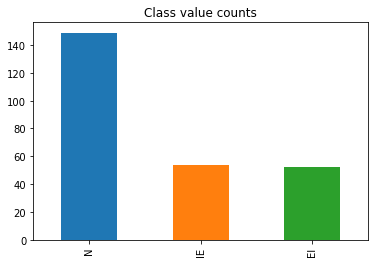

In [90]:
counts = y_test.value_counts()
counts.plot.bar(title="Class value counts")

### ========== Question 2.8 ==========
What would be the accuracy of the classifier, if all points were labelled as `N`? 

**Pro Tip** - You should always use a ['Dummy Model'](http://scikit-learn.org/0.19/modules/model_evaluation.html#dummy-estimators) (a ridiculously simple model) like this to compare with your 'real' models. It's very common for complex models to be outperformed by a simple model, such as predicting the most common class. When complex models are outperformed by 'Dummies', you should investigate why: often there was an issue with the code, the data, or the way the model works was misunderstood.

In [91]:
accuracy_score(y_test, ["N" for y in y_test])

0.5843137254901961

### ========== Question 2.9 ==========
Now we want to explore the effect of the `k` parameter. To do this, train the classifier multiple times, each time setting the KNN option to a different value. Try `5`, `10`, `50`, `100`, `200`, `500`, `1000`, `1500` and `2000` and test the classifier on the test set. How does the k parameter effect the results? *Hint: Consider how well the classifier is generalising to previously unseen data, and how it compares to the dumb prediction accuracy.*

In [96]:
accuracies = []
ks = [5, 10, 50, 100, 200, 500, 1000, 1500, 2000]

for k in ks:
    knn = KNeighboursClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    acc = accuracy_score(y_test, knn.predict(X_test))
    accuracies.append(acc)
    print("Testing accuracy for k =", k, ":\t", acc)

Testing accuracy for k = 5 :	 0.7803921568627451
Testing accuracy for k = 10 :	 0.8274509803921568
Testing accuracy for k = 50 :	 0.8705882352941177
Testing accuracy for k = 100 :	 0.8980392156862745
Testing accuracy for k = 200 :	 0.8980392156862745
Testing accuracy for k = 500 :	 0.9450980392156862
Testing accuracy for k = 1000 :	 0.9568627450980393
Testing accuracy for k = 1500 :	 0.6980392156862745
Testing accuracy for k = 2000 :	 0.5843137254901961


For low values of k, the algorithm does not do too well on unseen data. The decision boundaries seem to be too unstable, too strongly affected by outliers. 
At k in the range 500-1000 we seem to hit the sweet spot. But as we further increase k, our classifier tends to simply output the most common class. 
At k=2000 that appears to be what our classifier ALWAYS does, as its accuracy matches the accuracy of our dummy model exactly. 

### ========== Question 2.10 ==========
Plot the results (k-value on the x-axis and classification accuracy on the y-axis), making sure to mark the axes. Can you conclude anything from observing the plot?

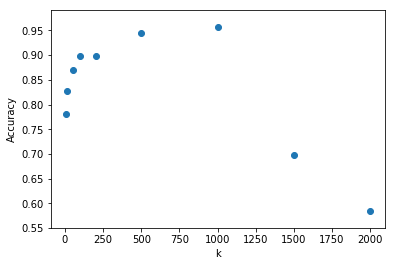

In [98]:
fig, ax = plt.subplots()
ax.scatter(ks, accuracies)
ax.set_xlabel('k')
ax.set_ylabel('Accuracy')
plt.show()

Our accuracy hits a plateau after k=500, increasing very fast in the range (0, 100) and decreasing very fast after k=1000.

### ========== Question 2.11 ==========
Select best value for `k` from Questions 2.9 and 2.10 and plot the normalised confusion matrix on the test set (you may use the provided function). Then plot the confusion matrix for a 5-nearest neighbour classifier. What do you observe?

In [101]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')

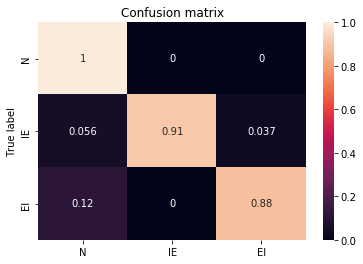

In [129]:
best_knn = KNeighboursClassifier(n_neighbors = 1000)
best_knn.fit(X_train, y_train)

simple_knn = KNeighboursClassifier(n_neighbors = 5)
simple_knn.fit(X_train, y_train)

classes = y_test.value_counts().index
test_totals = [len(y_test[y_test == label]) for label in classes]
norm_mat_test = np.array(test_totals * 3).reshape(3,3).transpose()

best_cm = confusion_matrix(y_test, best_knn.predict(X_test), labels=classes)
best_cm = np.divide(best_cm, norm_mat_test)
plot_confusion_matrix(best_cm, classes=classes)

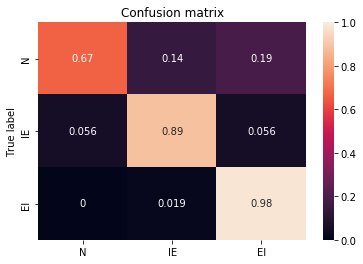

In [130]:
simple_cm = confusion_matrix(y_test, simple_knn.predict(X_test), labels=classes)
simple_cm = np.divide(simple_cm, norm_mat_test)
plot_confusion_matrix(simple_cm, classes=classes)

The classifier with k=1000 has perfect accuracy on instances of the most common class. Intuitively this makes sense, because a large k should make the most common classes selected more often. 

The confusion matrix for k=5, on the other hand, shows that the simple classifier performs way worse on instances of the most common class, but actually has close to perfect accuracy on instances of the EI class. Presumably, this corresponds to N instances in the outskirts of the region primarily associated with class N being falsely associated with the more densely sprinkled instances of classes IE and especially EI in their proximity. 

When k is large, the converse occurs. The instances in the outskirts of the N region may not be dense, but since the class is so common and N so large, they sometimes lead to members of the EI class to be associated with members of EI that don't lie in the centre of the according region. 

### ========== Question 2.12 ==========
Read about the [logarithimic loss](http://scikit-learn.org/0.19/modules/generated/sklearn.metrics.log_loss.html) (or cross-entropy loss). It is often the error metric used when we are trying to optimise classification models.

This metric takes as input the true labels and the estimated probability distributions (bernouli or multinomial). It makes sense to use this metric when we are interested not only in the predicted labels, but also in the confidence with which these labels are predicted.

For instance, think of the situation where you have a single test point and two classifiers. Both classifiers predict the label correctly, however classifier A predicts that the test point belongs to the class with probability 0.55, whereas classifier B predicts the correct class with probability 0.99. Classification accuracy would be the same for the two classifiers (why?) but the `log_loss` metric would indicate that classifier B should be favoured.

Produce a scatter plot similar to the one in Question 2.10 but this time show `log_loss` on your y axis. Which value for `k` would you pick if `log_loss` was the error metric? Comment on why this might happen, and which metric would be a better evaluator of performance.

Testing log loss for k = 5 :	 1.2279286161956937
Testing log loss for k = 10 :	 0.49015613095797766
Testing log loss for k = 50 :	 0.526997604112542
Testing log loss for k = 100 :	 0.5569746046973265
Testing log loss for k = 200 :	 0.6008637135906136
Testing log loss for k = 500 :	 0.6703631188217446
Testing log loss for k = 1000 :	 0.7547572553452911
Testing log loss for k = 1500 :	 0.8177287055931994
Testing log loss for k = 2000 :	 0.8753647883393483


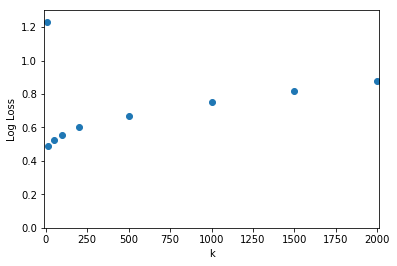

In [136]:
losses = []

for k in ks:
    knn = KNeighboursClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    loss = log_loss(y_test, knn.predict_proba(X_test))
    losses.append(loss)
    print("Testing log loss for k =", k, ":\t", loss)
    
fig, ax = plt.subplots()
ax.scatter(ks, losses)
ax.set_xlabel('k')
ax.set_ylabel('Log Loss')
ax.set_xlim([-10, 2010])
ax.set_ylim([0, 1.3])
plt.show()

For k=5 the log loss is largest. This corresponds to even 1 out of 5 nearest neighbors belonging to another class causing our classifier to be quite uncertain of its output. 

The log loss drops rapidly for k=10, as the algorithm becomes more stable. Outliers are, by definition, not densely packed, therefore we don't usually have more than one of them in a small area. This explains the low log loss value for k=10, actually the lowest for all k. 

As k grows further, so does the log loss. That is because the sets of nearest neighbours starts being less pure on average, as larger surroundings are considered. We would expect each set of nearest neighbours to contain a mixture of classes for larger k. 

For k=2000, k is close to our number of instances. The uncertainty of the model still isn't as high as for the k=5 model, but for a k this large, all the sets of nearest neighbours look quite similar each other, and are all quite polluted. They have to contain members of all classes, because k is larger than the number of instances in any single class. 

### ========== Question 2.13 ==========

Could you use the `log_loss` metric to evaluate the performance of an SVM classifier? Explain.

No, because SVM classifiers do not have any confidence measure. Their ouput is simply a -1 or 1, depending on which side of the learned hyperplane an instance lies on. 